# Quantum Fourier Transform (QFT)

QFT Unitary
$$F_N=\frac{1}{\sqrt{N}}\begin{bmatrix}
1&1&1&1&\cdots &1 \\
1&\omega_n&\omega_n^2&\omega_n^3&\cdots&\omega_n^{N-1} \\
1&\omega_n^2&\omega_n^4&\omega_n^6&\cdots&\omega_n^{2(N-1)}\\ 1&\omega_n^3&\omega_n^6&\omega_n^9&\cdots&\omega_n^{3(N-1)}\\
\vdots&\vdots&\vdots&\vdots&&\vdots\\
1&\omega_n^{N-1}&\omega_n^{2(N-1)}&\omega_n^{3(N-1)}&\cdots&\omega_n^{(N-1)(N-1)}
\end{bmatrix}
$$

where $$\omega_n= e^{\frac{2 \pi i}{N}}$$ 

for example, for 2 qubits, the operator is:

$$F_4=\frac{1}{2}\begin{bmatrix}
1&1&1&1 \\
1&e^{\frac{\pi i}{2}}&e^{\pi i}&e^{\frac{3 \pi i}{2}} \\
1&e^{\pi i}&e^{2 \pi i}&e^{\frac{6 \pi i}{2}}\\
1&e^{\frac{3 \pi i}{2}}&e^{\frac{6 \pi i}{2}}&e^{\frac{9 \pi i}{2}}
\end{bmatrix}
=\frac{1}{2}\begin{bmatrix}
1&1&1&1 \\
1&i&-1&-i \\
1&-1&1&-1\\
1&-i&-1&-i
\end{bmatrix}
$$

So, appying $F_4$ on the state $|\phi>=\frac{1}{2}[1,-1,1,-1]^T=\frac{1}{2}(|00>-|01>+|10>-|11>)$

$$F_4|\phi>=\frac{1}{2}\begin{bmatrix}
1&1&1&1 \\
1&i&-1&-i \\
1&-1&1&-1\\
1&-i&-1&-i
\end{bmatrix}\frac{1}{2}\begin{bmatrix}1\\-1\\1\\-1\end{bmatrix}=\frac{1}{4}\begin{bmatrix}0\\0\\4\\0\end{bmatrix}=\begin{bmatrix}0\\0\\1\\0\end{bmatrix}=|10>$$



[Example](https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22Z%22],[1,1,%22H%22],[1,%22%E2%80%A2%22,%22Z^%C2%BD%22],[%22%E2%80%A2%22,1,%22Z^%C2%BC%22],[1,%22H%22],[%22%E2%80%A2%22,%22Z^%C2%BD%22],[%22H%22],[%22Swap%22,1,%22Swap%22]]})

In [1]:
from IPython.display import IFrame

IFrame(src='http://localhost:8888/files/quirk.html#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22Z%22],[1,1,%22H%22],[1,%22%E2%80%A2%22,%22S%22],[%22%E2%80%A2%22,1,%22T%22],[1,%22H%22],[%22%E2%80%A2%22,%22S%22],[%22H%22],[%22Swap%22,1,%22Swap%22]]}', width=1000, height=650)

## Using IBM gates

$S=U_1(\frac{\pi}{2})$

and

$T=U_1(\frac{\pi}{4})$

it is possible to construct the previous cirtuit with qiskit


## Construct the circuit with qiskit

In [2]:
%matplotlib inline
from qiskit import *
import qiskit.tools.jupyter
%qiskit_version_table

## Auxiliary functions

In [3]:
def Display(string):
    from IPython.display import display, Markdown
    display(Markdown(string))
def VectorToLatex(A,Format='{:.4f}'):
    a="\\begin{bmatrix}"
    for i in range(A.shape[0]):
        a=a+Format.format(A[i])
        a=a+"\\\\"
    a=a+"\\end{bmatrix}"
    return(a)
def MatrixToLatex(A,Format='{:.4f}'):
    a="\\begin{bmatrix}"
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if ((j+1)%A.shape[1])==0:
                a=a+Format.format(A[i,j])
            else:
                a=a+Format.format(A[i,j])+"&"
        if ((i+1)%A.shape[0])!=0:
            a=a+"\\\\"
    a=a+"\\end{bmatrix}"
    return(a)

## Create a circuit with quantum register of 3 qubits and classical register of 3 bits

In [24]:
num_qubits=3

In [25]:
circuit=QuantumCircuit(num_qubits,num_qubits,name="QFT")

## Create the input state $|\phi>=\frac{1}{\sqrt{8}}[1,-1,1,-1,1,-1,1,-1]^T=\frac{1}{\sqrt{8}}(|000>-|001>+|010>-|011>+|100>-|101>+|110>-|111>)$

In [26]:
def input_state(circ, q, n):
    import math
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
    circ.z(q[0])
input_state(circuit,circuit.qregs[0],num_qubits)
circuit.barrier()

In [27]:
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circuit.copy(), simulator).result()
statevector = result.get_statevector(circuit)
#plot_state_city(statevector, title='Bell state')
Display("$$InputState=%s$$"%VectorToLatex(statevector))

$$InputState=\begin{bmatrix}0.3536+0.0000j\\-0.3536+0.0000j\\0.3536+0.0000j\\-0.3536+0.0000j\\0.3536+0.0000j\\-0.3536+0.0000j\\0.3536+0.0000j\\-0.3536+0.0000j\\\end{bmatrix}$$

## Apply the QFT

In [28]:
def qft(circ, q, n):
    import math
    """n-qubit QFT on q in circ."""
    for j in range(n-1,-1,-1):
        circ.h(q[j])
        for k in range(j-1,-1,-1):
           circ.cu1(math.pi/float(2**(j-k)), q[k], q[j])
    circ.barrier()
    for j in range(n//2):
        circ.swap(j,n-j-1)
qft(circuit,circuit.qregs[0],num_qubits)
circuit.barrier()

circuit.measure(circuit.qregs[0],circuit.cregs[0])

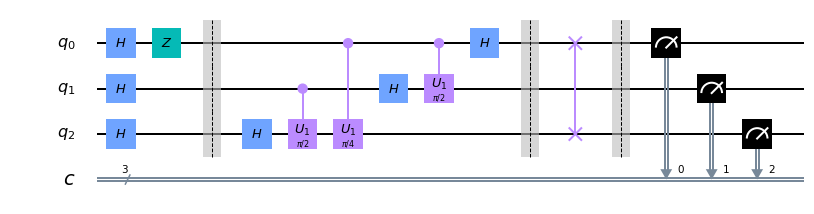

In [29]:
circuit.draw(output='mpl')


## Get the final state

In [31]:
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circuit.copy(), simulator).result()
statevector = result.get_statevector(circuit)
#plot_state_city(statevector, title='Bell state')
Display("$$OutputState=%s$$"%VectorToLatex(statevector))

$$OutputState=\begin{bmatrix}0.0000+0.0000j\\0.0000+0.0000j\\0.0000+0.0000j\\0.0000+0.0000j\\1.0000-0.0000j\\0.0000+0.0000j\\0.0000+0.0000j\\0.0000+0.0000j\\\end{bmatrix}$$

## Or the counts of measurement for each state

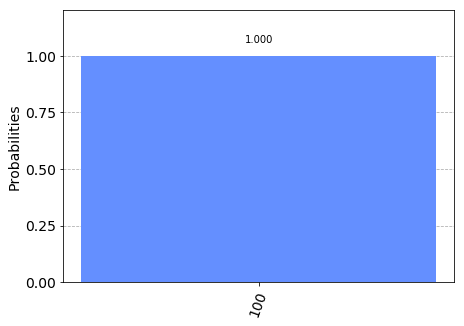

In [32]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circuit, simulator).result()
plot_histogram(result.get_counts(circuit))

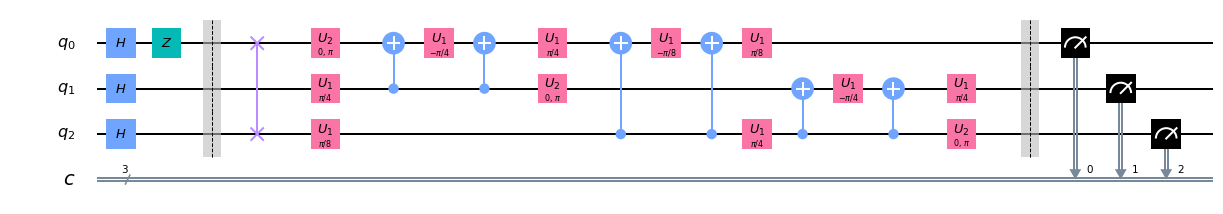

In [33]:
from qiskit.aqua.components.qfts import Standard as QFT
circuit=QuantumCircuit(num_qubits,num_qubits,name="QFT")
input_state(circuit,circuit.qregs[0],num_qubits)
circuit.barrier()
for j in range(num_qubits//2):
        circuit.swap(j,num_qubits-j-1)
QFT(num_qubits=num_qubits).construct_circuit(mode="circuit", qubits=circuit.qregs[0], circuit=circuit, do_swaps=False)
circuit.barrier()

circuit.measure(circuit.qregs[0],circuit.cregs[0])
circuit.draw(output='mpl')

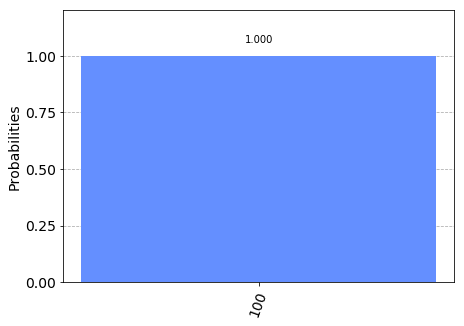

In [34]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circuit, simulator).result()
plot_histogram(result.get_counts(circuit))

In [37]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')

Credentials are already in use. The existing account in the session will be replaced.


In [36]:
%qiskit_backend_overview

/home/agomez/.conda/envs/cursoQC/lib/python3.5/site-packages/qiskit/providers/models/backendconfiguration.py:367: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


In [38]:
simulator=provider.get_backend('ibmqx2')

In [39]:
job=execute(circuit,backend=simulator)

In [40]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


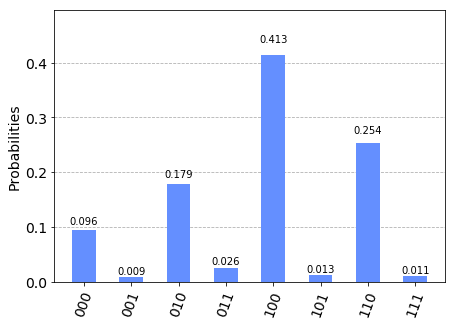

In [42]:
result = job.result()

plot_histogram(result.get_counts(circuit))